# **Laboratory Work 1**

# **Overview**

## Features:

* Feature selection by filtering;
* Feature Normalization;
* Using KNN model for regression task.

## Tasks

### Perform a kind of an ablation study:

0) Load California house prices dataset.
Take a look at the data.
[California housing dataset page](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html) ✅

```
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)
california_housing = california_housing.frame
california_housing.head()
```

1) Train KNN Regressor. You may use with grid search to select the hyperparameters. Train the classifier **with and without** feature selection step (on all available features). Is there any change in quality on test data? In prediction speed? Compare the two models` quality. ✅

2) Train Linear regression (Ridge, Lasso) **with and without** feature normalization/scaling step. How does that affect the model`s quality on test data? Compare the two models quality. ✅

3) Train Linear regression **with and without** feature selection step. How does that affect the model`s quality on test data? If you  try to filter even more features, how would that affect the model performance? How will coefficients change? ✅

4)(**optional**) Implement a brute force KNN Algorithm (without using classes from sklearn or any other solutions). Test it on Boston or California, Iris datasets. ❌
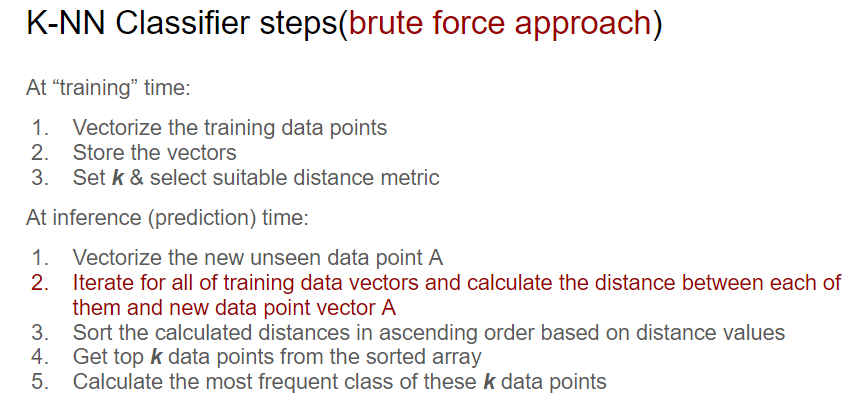


## How to run:

1. Run *Preparation* block
2. Run one cell from *Prepare / Change Dataset* block
3. Now you can run any model from any task
4. Compare the score with the corresponding result from one of the results tables
5. Profit B-)

Note: if you want to change the number of features in a dataset you should rerun one of the cells in the *Prepare / Change Dataset* block


# **Code**

## Preparation

### Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### Dataset

In [ ]:
def get_california_dataset() -> pd.core.frame.DataFrame:
  return fetch_california_housing(as_frame=True).frame

### Percentile

In [ ]:
def get_percentile(dataframe: pd.core.frame.DataFrame) -> pd.core.frame.DataFrame:
  return pd.concat([dataframe.describe().T, dataframe.median()], axis=1).rename(columns={0:'median'})

### Correlations

In [ ]:
def draw_corr(dataframe: pd.core.frame.DataFrame, corr_method: str='spearman'):
  correlation = dataframe.corr(method=corr_method)
  plt.figure(figsize=(12,10))
  sns.heatmap(correlation, annot=True)

In [ ]:
def get_corr(dataframe: pd.core.frame.DataFrame,
             corr_method: str='spearman',
             target: str='MedHouseVal') -> pd.core.series.Series:
  correlation = dataframe.corr(method=corr_method)
  return correlation[target]

### Feature extraction

In [ ]:
def choose_features(correlation: pd.core.series.Series, corr_pow: float=0.5) -> pd.core.series.Series:
  return correlation[(correlation > corr_pow) | (correlation < -corr_pow)]

In [ ]:
def extract_features(dataframe: pd.core.frame.DataFrame, relevant_features: pd.core.series.Series):
  dataframe.drop([i for i in dataframe.columns.to_list() if i not in relevant_features.keys().to_list()], axis=1, inplace=True)

### Dataset preparation

In [ ]:
def prepare_dataset(dataframe: pd.core.frame.DataFrame) -> tuple:
  features_columns = [i for i in dataframe.columns.values[:-1]]
  return dataframe[features_columns].values, dataframe[dataframe.columns.values[-1]].values

In [ ]:
def split_dataset(dataframe: pd.core.frame.DataFrame) -> list:
  X, Y = prepare_dataset(dataframe)
  return train_test_split(X, Y, test_size=0.20, shuffle=True)

### Feature normalization

In [ ]:
def normalize_features(x_train: np.ndarray, x_test: np.ndarray, scaler_type: str='minmax') -> tuple:
  if scaler_type == 'minmax':
    scaler = MinMaxScaler()
  elif scaler_type == 'standard':
    scaler = StandardScaler()
  return scaler.fit_transform(x_train), scaler.fit_transform(x_test)

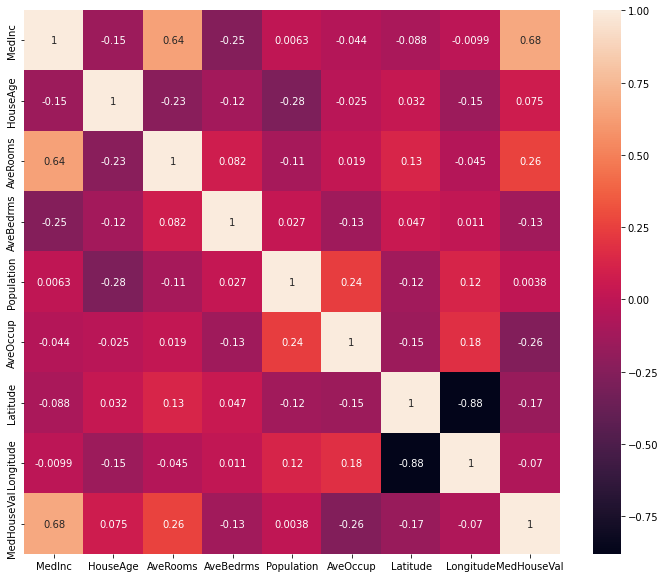

In [ ]:
# ПРОВЕРКА

california = get_california_dataset()
draw_corr(california)
# corr = get_corr(california)
# features = choose_features(corr, 0.2)
# extract_features(california, features)
# x_train, x_test, y_train, y_test = split_dataset(california)
# type(normalize_features(x_train, x_test)[0])

### Get Dataset

In [ ]:
def get_dataset(corr_pow: float=0) -> tuple:
  california = get_california_dataset()
  if corr_pow != 0:
    corr = get_corr(california)
    features = choose_features(corr, corr_pow)
    extract_features(california, features)
  return split_dataset(california)

### Prepare / Change Dataset

In [ ]:
# one-featured
x_train, x_test, y_train, y_test = get_dataset(0.5)
x_train_transformed, x_test_transformed = normalize_features(x_train, x_test)
x_train_scaled, x_test_scaled = normalize_features(x_train, x_test, 'standard')

In [ ]:
# three-featured
x_train, x_test, y_train, y_test = get_dataset(0.2)
x_train_transformed, x_test_transformed = normalize_features(x_train, x_test)
x_train_scaled, x_test_scaled = normalize_features(x_train, x_test, 'standard')

In [ ]:
# all features
x_train, x_test, y_train, y_test = get_dataset()
x_train_transformed, x_test_transformed = normalize_features(x_train, x_test)
x_train_scaled, x_test_scaled = normalize_features(x_train, x_test, 'standard')

## Task 1

_Train KNN Regressor. You may use with grid search to select the hyperparameters. Train the classifier with and without feature selection step (on all available features). Is there any change in quality on test data? In prediction speed? Compare the two models` quality._

### Fit KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

#### Basic Features

In [ ]:
%%time
model = KNeighborsRegressor(n_neighbors=101)
model.fit(x_train, y_train)
model.score(x_test, y_test)

CPU times: user 121 ms, sys: 557 µs, total: 122 ms
Wall time: 125 ms


0.047163836246097435

Results

In [ ]:
pd.DataFrame(
    {
     r"n_Features\n_Neighbors": ['1 Feature', '3 Features', 'All Features'],
     3: [
         {'score': 0.32, 'time': '20.4 ms'},
         {'score': 0.53, 'time': '33.8 ms'},
         {'score': 0.12, 'time': '50 ms'}
         ],
     5: [
         {'score': 0.38, 'time': '17.2 ms'},
         {'score': 0.58, 'time': '35.2 ms'},
         {'score': 0.16, 'time': '49.1 ms'}
         ],
     101: [
         {'score': 0.47, 'time': '63.1 ms'},
         {'score': 0.62, 'time': '147 ms'},
         {'score': 0.05, 'time': '125 ms'}
           ]
     }
     )

,n_Features\n_Neighbors,3,5,101
0,1 Feature,"{'score': 0.32, 'time': '20.4 ms'}","{'score': 0.38, 'time': '17.2 ms'}","{'score': 0.47, 'time': '63.1 ms'}"
1,3 Features,"{'score': 0.53, 'time': '33.8 ms'}","{'score': 0.58, 'time': '35.2 ms'}","{'score': 0.62, 'time': '147 ms'}"
2,All Features,"{'score': 0.12, 'time': '50 ms'}","{'score': 0.16, 'time': '49.1 ms'}","{'score': 0.05, 'time': '125 ms'}"


#### Normalized Features *MinMaxScaler*

In [ ]:
%%time
model = KNeighborsRegressor(n_neighbors=101)
model.fit(x_train_transformed, y_train)
model.score(x_test_transformed, y_test)

CPU times: user 573 ms, sys: 2.96 ms, total: 576 ms
Wall time: 592 ms


0.6571646273709626

Results (normalized features)

In [ ]:
pd.DataFrame(
    {
     r"n_Features\n_Neighbors": ['1 Feature', '3 Features', 'All Features'],
     3: [
         {'score': 0.31, 'time': '21.9 ms'},
         {'score': 0.27, 'time': '43.5 ms'},
         {'score': 0.63, 'time': '504 ms'}
         ],
     5: [
         {'score': 0.38, 'time': '15.3 ms'},
         {'score': 0.27, 'time': '38.6 ms'},
         {'score': 0.64, 'time': '205 ms'}
         ],
     101: [
         {'score': 0.64, 'time': '205 ms'},
         {'score': 0.44, 'time': '338 ms'},
         {'score': 0.66, 'time': '592 ms'}
         ]
     }
     )

,n_Features\n_Neighbors,3,5,101
0,1 Feature,"{'score': 0.31, 'time': '21.9 ms'}","{'score': 0.38, 'time': '15.3 ms'}","{'score': 0.64, 'time': '205 ms'}"
1,3 Features,"{'score': 0.27, 'time': '43.5 ms'}","{'score': 0.27, 'time': '38.6 ms'}","{'score': 0.44, 'time': '338 ms'}"
2,All Features,"{'score': 0.63, 'time': '504 ms'}","{'score': 0.64, 'time': '205 ms'}","{'score': 0.66, 'time': '592 ms'}"


#### Normalized Features *StandardScaler*

In [ ]:
%%time
model = KNeighborsRegressor(n_neighbors=101)
model.fit(x_train_scaled, y_train)
model.score(x_test_scaled, y_test)

CPU times: user 829 ms, sys: 0 ns, total: 829 ms
Wall time: 833 ms


0.6441855851184457

Results

In [ ]:
pd.DataFrame(
    {
     r"n_Features\n_Neighbors": ['1 Feature', '3 Features', 'All Features'],
     3: [
         {'score': 0.32, 'time': '19.3 ms'},
         {'score': 0.5, 'time': '38.2 ms'},
         {'score': 0.63, 'time': '529 ms'}
         ],
     5: [
         {'score': 0.4, 'time': '14.5 ms'},
         {'score': 0.56, 'time': '39.4 ms'},
         {'score': 0.67, 'time': '341 ms'}
         ],
     101: [
         {'score': 0.49, 'time': '67.6 ms'},
         {'score': 0.6, 'time': '474 ms'},
         {'score': 0.64, 'time': '833 ms'}
         ]
     }
     )

,n_Features\n_Neighbors,3,5,101
0,1 Feature,"{'score': 0.32, 'time': '19.3 ms'}","{'score': 0.4, 'time': '14.5 ms'}","{'score': 0.49, 'time': '67.6 ms'}"
1,3 Features,"{'score': 0.5, 'time': '38.2 ms'}","{'score': 0.56, 'time': '39.4 ms'}","{'score': 0.6, 'time': '474 ms'}"
2,All Features,"{'score': 0.63, 'time': '529 ms'}","{'score': 0.67, 'time': '341 ms'}","{'score': 0.64, 'time': '833 ms'}"


### Conclusions

The KNN Regression model was trained on the *California Housing* dataset with selected features (1, 3) and without selection step. The model was also ran on normalised datasets using *MinMaxScaler* and *StandardScaler* and on non-normalized datasets. A different number of nearest neighbors was also used (3, 5, 101).

The best results were shown on scaled datasets. The best one (score 0.67) was reached on a dataset scaled with *StandardScaler* judging by 5 nearest neighbors. The result reached on a dataset which consisted of all features from the dataset scaled with *MinMaxScaler*, 101 nearest neighbors, is also not far from the best one (score 0.66).
The lowest results were shown by the model on the non-normalized dataset containing all features from the dataset (score < 0.2).

It might be also seen from the results, that in the majority of cases the model performs better with the increase of a features number, although many features have little correlation with target. A bigger quantity of neighbors also increases the performance of the model, but the work time also increases correspondingly.

## Task 2

_Train Linear regression (Ridge, Lasso) with and without feature normalization/scaling step. How does that affect the model`s quality on test data? Compare the two models quality._

### Fit Linear Ridge Regressor

In [ ]:
from sklearn.linear_model import Ridge

#### Basic Features

In [ ]:
%%time
model = Ridge(random_state=1)
model.fit(x_train, y_train)
model.score(x_test, y_test)

CPU times: user 6.66 ms, sys: 4.16 ms, total: 10.8 ms
Wall time: 13 ms


0.6268612902693624

#### Normalized Features *MinMaxScaler*

In [ ]:
%%time
model = Ridge(random_state=1)
model.fit(x_train_transformed, y_train)
model.score(x_test_transformed, y_test)

CPU times: user 3.33 ms, sys: 4.93 ms, total: 8.26 ms
Wall time: 8.23 ms


0.619158894458858

#### Normalized Features *StandardScaler*

In [ ]:
%%time
model = Ridge(random_state=1)
model.fit(x_train_scaled, y_train)
model.score(x_test_scaled, y_test)

CPU times: user 4.24 ms, sys: 1.06 ms, total: 5.3 ms
Wall time: 4.09 ms


0.6263941930451615

#### Results

In [ ]:
pd.DataFrame(
    {
     r"n_Features\Normalization": ['1 Feature', '3 Features', 'All Features'],
     'Basic Features': [
         {'score': 0.46, 'time': '3.79 ms'},
         {'score': 0.47, 'time': '7.57 ms'},
         {'score': 0.63, 'time': '13 ms'}
         ],
     'Normalized MinMax': [
         {'score': 0.46, 'time': '5.89 ms'},
         {'score': 0.39, 'time': '7.67 ms'},
         {'score': 0.62, 'time': '8.23 ms'}
         ],
     'Normalized Standard': [
         {'score': 0.46, 'time': '7.08 ms'},
         {'score': 0.48, 'time': '7.71 ms'},
         {'score': 0.63, 'time': '4.09 ms'}
           ]
     }
     )

,n_Features\Normalization,Basic Features,Normalized MinMax,Normalized Standard
0,1 Feature,"{'score': 0.46, 'time': '3.79 ms'}","{'score': 0.46, 'time': '5.89 ms'}","{'score': 0.46, 'time': '7.08 ms'}"
1,3 Features,"{'score': 0.47, 'time': '7.57 ms'}","{'score': 0.39, 'time': '7.67 ms'}","{'score': 0.48, 'time': '7.71 ms'}"
2,All Features,"{'score': 0.63, 'time': '13 ms'}","{'score': 0.62, 'time': '8.23 ms'}","{'score': 0.63, 'time': '4.09 ms'}"


### Fit Linear Lasso Regressor

In [ ]:
from sklearn.linear_model import Lasso

#### Basic Features

In [ ]:
%%time
model = Lasso(alpha=0.1, random_state=1, selection='random')
model.fit(x_train, y_train)
model.score(x_test, y_test)

CPU times: user 35.1 ms, sys: 40.4 ms, total: 75.5 ms
Wall time: 53.4 ms


0.5586288803979642

#### Normalized Features *MinMaxScaler*

In [ ]:
%%time
model = Lasso(alpha=0.1, random_state=1, selection='random')
model.fit(x_train_transformed, y_train)
model.score(x_test_transformed, y_test)

CPU times: user 7.15 ms, sys: 3.84 ms, total: 11 ms
Wall time: 16.4 ms


0.01451712965675489

#### Normalized Features *StandardScaler*

In [ ]:
%%time
model = Lasso(alpha=0.1, random_state=1, selection='random')
model.fit(x_train_scaled, y_train)
model.score(x_test_scaled, y_test)

CPU times: user 8.63 ms, sys: 2.65 ms, total: 11.3 ms
Wall time: 12.6 ms


0.5001885091164731

#### Results

In [ ]:
pd.DataFrame(
    {
     r"n_Features\Normalization": ['1 Feature', '3 Features', 'All Features'],
     'Basic Features': [
         {'score': 0.48, 'time': '14 ms'},
         {'score': 0.49, 'time': '17.6 ms'},
         {'score': 0.56, 'time': '53.4 ms'}
         ],
     'Normalized MinMax': [
         {'score': 0.04, 'time': '4.06 ms'},
         {'score': 0.04, 'time': '14.2 ms'},
         {'score': 0.02, 'time': '16.4 ms'}
         ],
     'Normalized Standard': [
         {'score': 0.48, 'time': '7.4 ms'},
         {'score': 0.49, 'time': '10.7 ms'},
         {'score': 0.5, 'time': '12.6 ms'}
           ]
     }
     )

,n_Features\Normalization,Basic Features,Normalized MinMax,Normalized Standard
0,1 Feature,"{'score': 0.48, 'time': '14 ms'}","{'score': 0.04, 'time': '4.06 ms'}","{'score': 0.48, 'time': '7.4 ms'}"
1,3 Features,"{'score': 0.49, 'time': '17.6 ms'}","{'score': 0.04, 'time': '14.2 ms'}","{'score': 0.49, 'time': '10.7 ms'}"
2,All Features,"{'score': 0.56, 'time': '53.4 ms'}","{'score': 0.02, 'time': '16.4 ms'}","{'score': 0.5, 'time': '12.6 ms'}"


### Conclusions

Two *Linear Regression* models (*Ridge* and *Lasso*) were trained on the *California Housing* dataset with and without normalization (*MinMaxScaler, StandardScaler*) and feature selection (1, 3, all features) steps.

The highest accuracy was achieved by the *Ridge* model using the whole dataset (scores > 0.6). The highest result of the *Lasso* model (score 0.56) was reached without feature selection and normalization steps. Although it occured that lowering the *alpha* parameter increased the performance of the *Lasso* model, its results were still worse than the results shown by the *Ridge* model. The poorest score of 0.02 was shown on the whole dataset with features normalized by *MinMaxScaler*. The *Ridge* model also works faster than the *Lasso*.

## Task 3
_Train Linear regression with and without feature selection step. How does that affect the model`s quality on test data? If you try to filter even more features, how would that affect the model performance? How will coefficients change?_

### Fit Linear Regressor

In [ ]:
from sklearn.linear_model import LinearRegression

#### Basic Features

In [ ]:
%%time
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

CPU times: user 4.12 ms, sys: 3.13 ms, total: 7.26 ms
Wall time: 8.17 ms


0.4977067370591457

#### Normalized Features *MinMaxScaler*

In [ ]:
%%time
model = LinearRegression()
model.fit(x_train_transformed, y_train)
model.score(x_test_transformed, y_test)

CPU times: user 4.26 ms, sys: 4.03 ms, total: 8.29 ms
Wall time: 9.49 ms


0.4598175983110906

#### Normalized Features *StandardScaler*

In [ ]:
%%time
model = LinearRegression()
model.fit(x_train_scaled, y_train)
model.score(x_test_scaled, y_test)

CPU times: user 9.27 ms, sys: 8.04 ms, total: 17.3 ms
Wall time: 13.3 ms


0.6205796321176891

### Results

In [ ]:
pd.DataFrame(
    {
     r"n_Features\Normalization": ['1 Feature', '3 Features', 'All Features'],
     'Basic Features': [
         {'score': 0.47, 'time': '3.52 ms'},
         {'score': 0.47, 'time': '11.2 ms'},
         {'score': 0.61, 'time': '7.48 ms'}
         ],
     'Normalized MinMax': [
         {'score': 0.47, 'time': '2.52 ms'},
         {'score': 0.34, 'time': '6.89 ms'},
         {'score': 0.63, 'time': '15.3 ms'}
         ],
     'Normalized Standard': [
         {'score': 0.47, 'time': '2.93 ms'},
         {'score': 0.48, 'time': '13.8 ms'},
         {'score': 0.62, 'time': '17.6 ms'}
           ]
     }
     )

,n_Features\Normalization,Basic Features,Normalized MinMax,Normalized Standard
0,1 Feature,"{'score': 0.47, 'time': '3.52 ms'}","{'score': 0.47, 'time': '2.52 ms'}","{'score': 0.47, 'time': '2.93 ms'}"
1,3 Features,"{'score': 0.47, 'time': '11.2 ms'}","{'score': -0.05, 'time': '6.89 ms'}","{'score': 0.48, 'time': '13.8 ms'}"
2,All Features,"{'score': 0.61, 'time': '7.48 ms'}","{'score': 0.63, 'time': '15.3 ms'}","{'score': 0.62, 'time': '17.6 ms'}"


### Conclusions

The *Linear Regression* model was trained on the *California Housing* dataset with and without feature selection and normalization steps.

The highest accuracy (score > 0.6) was reached on the dataset without feature selection. Normalization also improved the model's performance.

However, the worst accuracy was shown on the dataset containing 3 features normalized with *MinMaxScaler*. It is the only negative result (score -0.05).

It is also interesting to see that the performance of the model has not changed drastically with the increasing of features quantity from one to three, except the dramatic fall in accuracy with *MinMax* normalization.